# QF600 Asset Pricing
## Capital Asset Pricing Model (CAPM)
### Chia Jun Xian Edmund

Market_Portfolio.xlsx contains monthly nominal (net) returns for the market portfolio, expressed as a percentage. These returns cover the ten-year period from Jan 2004 through Dec 2013. Assume that the (net) risk-free rate is 0.13% per month.

Market Model

Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model: regress the monthly excess returns for each industry portfolio on the monthly excess returns for the market portfolio.

1. Create a table showing the intercept and slope coefficients for the ten industry portfolios.

2. Briefly explain the economic significance of the intercept and slope coefficients.

Security Market Line (SML)

Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's. This will give you the intercept and slope coefficients for the SML. (Warning: the results may be very different from what you would expect!)

3. Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis.

4. Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.)

5. Briefly explain the economic significance of the SML.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')

In [13]:
Industry_Portfolio = \
    pd \
        .read_excel('Industry_Portfolios.xlsx')

Market_Portfolio = \
    pd \
        .read_excel('Market_Portfolio.xlsx')

## Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model: regress the monthly excess returns for each industry portfolio on the monthly excess returns for the market portfolio

In [14]:
#get industry list
industry_list = \
    Industry_Portfolio \
        .columns \
            .to_list()

industry_list.remove('Date')

In [15]:
riskfree = 0.13

#create regression dictionary to append
regression = {
    'industry' : [],
    'α' : [],
    'β' : []
    }

#market model X is excess market returns
X = \
    Market_Portfolio.Market - riskfree

X = sm.add_constant(X)

#loop each industry and regression each industry portfolio with market portfolio
for industry in industry_list:
    Y = \
        Industry_Portfolio[industry] - riskfree

    market_model = sm.OLS(Y,X)

    market_result = market_model.fit()

    regression['industry'].append(industry)

    regression['α'].append(market_result.params[0]) # intercept, pricing error relative to CAPM

    regression['β'].append(market_result.params[1]) # slope, degree of exposure to market risk

print('Answer 1')
regression = \
    pd \
        .DataFrame(
            regression, 
            columns = ['industry', 'α', 'β']
            )

regression

Answer 1


,industry,α,β
0,NoDur,0.369443,0.652647
1,Durbl,-0.415599,1.648536
2,Manuf,0.159771,1.169846
3,Enrgy,0.501719,0.969850
4,HiTec,-0.064020,1.132969
5,Telcm,0.194691,0.900729
6,Shops,0.275492,0.826492
7,Hlth,0.237841,0.673036
8,Utils,0.444585,0.538086
9,Other,-0.387135,1.207309


## 2. Briefly explain the economic significance of the intercept and slope coefficients.

The slope coefficients provide an estimate of the industry portfolio's beta, the amount of exposure to systematic market risk. \
The intercept represents pricing error relative to CAPM for individual assets or 'passive' portfolios. A positive intercept indicates that CAPM is underpredicting the returns of the industry portfolio and thus the portfolio is underpriced and lies above the SML vice versa.

## Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

In [16]:
mean_industry_ret = \
    pd \
        .DataFrame(Industry_Portfolio.mean(axis= 0)) \
            .rename(columns = {0 : 'mean_ret'}) \
                .iloc[1 : ,] # removes the date row

mean_market_ret = \
    pd \
        .DataFrame(Market_Portfolio.mean(axis= 0)) \
            .rename(columns = {0 : 'mean_ret'}) \
                .iloc[1 : ,]


In [17]:
#join industry and market portfolios

combined_returns = \
    pd \
        .concat(
            [
                mean_industry_ret, 
                mean_market_ret]
        ) \
        .reset_index() \
            .rename(
                columns = {'index' : 'industry'}
                )

print('Answer 3')
combined_returns

Answer 3


,industry,mean_ret
0,NoDur,0.902833
1,Durbl,0.733333
2,Manuf,1.012833
3,Enrgy,1.231167
4,HiTec,0.766250
5,Telcm,0.881417
6,Shops,0.916333
7,Hlth,0.783833
8,Utils,0.907167
9,Other,0.489083


Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's. This will give you the intercept and slope coefficients for the SML. (Warning: the results may be very different from what you would expect!)

3. Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis.

4. Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.)

In [18]:
#append market beta 

market_row = \
    {
    'industry': 'Market', 
    'α': 0, 
    'β': 1
    }
 
regression = \
    regression \
        .append(
            market_row, 
            ignore_index = True) 

In [19]:
#merge with regression to get mean_ret and beta
SML = \
    regression \
        .merge(
            combined_returns, 
            how = 'inner'
            )

In [20]:
#SML X is beta, Y is mean return, regression mean return on beta 
SML_X = SML.β

SML_X = sm.add_constant(SML_X)

SML_Y = SML.mean_ret

SML_model = sm.OLS(SML_Y, SML_X)

SML_result = SML_model.fit()

SML_intercept = SML_result.params[0] # risk free rate

SML_slope = SML_result.params[1] # treynor ratio

In [21]:
SML_line = \
    pd \
        .DataFrame(
            np \
                .arange(0, 2.01, 0.1)) \
                    .rename(
                        columns = {0 : 'β'}
                            )

SML_line['ret'] = \
    SML_intercept + SML_line.β * SML_slope


Answer 4 & 5


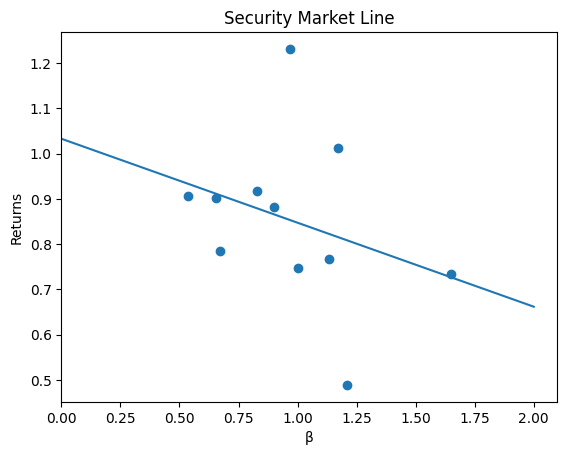

In [22]:
plt \
    .plot(SML_line['β'], 
         SML_line['ret'],
         label = 'SML')

plt \
    .scatter(SML.β, 
         SML.mean_ret
         )

plt \
    .xlim(xmin = 0)

plt \
    .xlabel('β')

plt \
    .ylabel('Returns')

plt \
    .title('Security Market Line')

print('Answer 4 & 5')
plt.show()

## 5. Briefly explain the economic significance of the SML.

SML provides a linear relationship measuring the expected return with respect to an Asset's / Portfolio's beta. Assets / Portfolio's with higher beta indicate a greater exposure to systematic market risk and hence demands a higher expected return. Assets / Portfolio's that lie on the line of the SML have the same treynor ratio (risk premium to beta) in equilibrium. Assets that lie above the SML are underpriced and investors will buy the asset, causing prices to rise and reutrns to fall vice versa.